# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [2]:
%pip --no-cache-dir install tfds-nightly

     |████████████████████████████████| 3.3MB 6.7MB/s 
  Found existing installation: tensorflow-metadata 0.21.2
    Uninstalling tensorflow-metadata-0.21.2:
      Successfully uninstalled tensorflow-metadata-0.21.2


In [0]:
# TODO: Make all necessary imports.
# Import warnings to filter the warnings about new versions, ...
import warnings
warnings.filterwarnings('ignore')

In [0]:
# To render plots under the box, instead of in another window:
%matplotlib inline

# Improve the resolution of the plots
%config InlineBackend.figure_format = 'retina'

# We are pulling the data from a TensorFlow Datasets, so we need to import it
import tensorflow_datasets as tfds

# Import the image manipulation and model training packages and libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Import TensorFlow hub to load the pretrained model (MobileNet)
import tensorflow_hub as hub

In [5]:
# Check what versions of TensorFlow and Keras we are working with, and if GPU is available
print(f'TensorFlow Version: {tf.__version__}')
print(f'Keras Version: {tf.keras.__version__}')
print(f'GPU available: {tf.test.is_gpu_available()}')

TensorFlow Version: 2.2.0-rc4
Keras Version: 2.3.0-tf
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available: True


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [6]:
# Command to avoid checksum error
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

2020-05-06 21:08:41.857288: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
I0506 21:08:44.158828 140475914585984 download_and_prepare.py:194] Running download_and_prepare for dataset(s):
oxford_flowers102
I0506 21:08:44.406046 140475914585984 dataset_info.py:427] Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: oxford_flowers102/2.1.1
I0506 21:08:45.275553 140475914585984 dataset_info.py:358] Load dataset info from /tmp/tmpm5f80d0jtfds
I0506 21:08:45.286542 140475914585984 download_and_prepare.py:133] download_and_prepare for dataset oxford_flowers102/2.1.1...
I0506 21:08:45.287070 140475914585984 dataset_builder.py:333] Generating dataset oxford_flowers102 (/root/tensorflow_datasets/oxford_flowers102/2.1.1)
Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]I0506 21:08:45.558420 140475914585984 download_manager.py:301] D

In [0]:
# TODO: Load the dataset with TensorFlow Datasets.
# TODO: Create a training set, a validation set and a test set.
## I leave split=None as the data was already split in training, validation and test sets.

(training_set, validation_set, test_set), dataset_info = tfds.load('oxford_flowers102', split=['train','validation','test'], as_supervised=True, with_info=True)

## Explore the Dataset

In [8]:
dataset_info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    version=2.1.1,
    description='The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1020 images each).
The test set consists of the remaining 6149 images (minimum 20 per class).',
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    total_num_examples=8

In [9]:
# TODO: Get the number of examples in each set from the dataset info.
number_of_examples = dataset_info.splits['test'].num_examples + dataset_info.splits['train'].num_examples + dataset_info.splits['validation'].num_examples

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = dataset_info.features['label'].num_classes

print(f'The total number of samples is: {number_of_examples}')
print(f'The number of classes is: {num_classes}')

The total number of samples is: 8189
The number of classes is: 102


In [10]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
i = 1
for image, label in training_set.take(3):
    print(f'Image number {i}:')
    print(f'The shape of this image is: {image.shape}')
    print(f'The label of this image is: {label}\n')
    i += 1




Image number 1:
The shape of this image is: (500, 667, 3)
The label of this image is: 72

Image number 2:
The shape of this image is: (500, 666, 3)
The label of this image is: 84

Image number 3:
The shape of this image is: (670, 500, 3)
The label of this image is: 70



### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [0]:
import json
with open('label_map.json', 'r') as f:
    class_names = json.load(f)


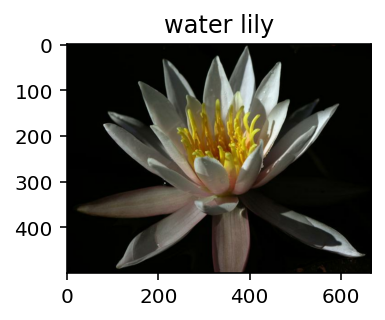

In [13]:
# Put a name with its name to

for image, label in training_set.take(1):
    image = image.numpy()
    label = label.numpy()

    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(image)
    # We use the index [label+1] because the labels go from 0 to 101 but the "class_names" list has indexes from 1 to 102
    a.set_title(class_names[str(label+1)])



## Create Pipeline

In [0]:
# TODO: Create a pipeline for each set.

# Define batch size, image size and total training samples
batch_size = 34 #so there are 30 batches exactly with the 1020 training samples
image_size = (224, 224)
total_training_samples = 1020

# Normalize the image so that it has the size specified by the MobileNet Network (224 x 224 pixels)
# and every pixel has a pixel value between 0 and 1
def normalize_image(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, image_size)
    image /= 255
    return image, label

# Create the training, validation and test batches
training_batches = training_set.shuffle(total_training_samples//2).map(normalize_image).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(normalize_image).batch(batch_size).prefetch(1)
test_batches = test_set.map(normalize_image).batch(batch_size).prefetch(1)

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [15]:
# Clear session every time we remake the model so that the model and the layer names start from 0
tf.keras.backend.clear_session()

# TODO: Build and train your network.

# Load MobileNet pre-trained network (feature_vector, without classification layer as we will add our own)
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(224, 224, 3))

# Fix the weights and biases of the feature extractor so they don't change in the training and overfir
feature_extractor.trainable = False

# Build our model with a softmax-activated classification layer after the MobileNet network
# the output layer has a number of neurons (nodes) equal to our number of classes (102 in this case)
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(102, activation='softmax')
])

# Print a model summary to see schematically that the model looks as we expect
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
# Compile the model with optimizer, loss and metrics parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and validate
EPOCHS = 5

train_history = model.fit(training_batches,
                          epochs=EPOCHS,
                          validation_data=validation_batches)

Epoch 1/5
30/30 [==============================] - 7s 241ms/step - loss: 4.3180 - accuracy: 0.0922 - val_loss: 3.1659 - val_accuracy: 0.3500
Epoch 2/5
30/30 [==============================] - 7s 228ms/step - loss: 2.1722 - accuracy: 0.6735 - val_loss: 2.0849 - val_accuracy: 0.6275
Epoch 3/5
30/30 [==============================] - 7s 232ms/step - loss: 1.1703 - accuracy: 0.9000 - val_loss: 1.5829 - val_accuracy: 0.7167
Epoch 4/5
30/30 [==============================] - 7s 229ms/step - loss: 0.7052 - accuracy: 0.9608 - val_loss: 1.3300 - val_accuracy: 0.7578
Epoch 5/5
30/30 [==============================] - 7s 232ms/step - loss: 0.4714 - accuracy: 0.9824 - val_loss: 1.1851 - val_accuracy: 0.7696


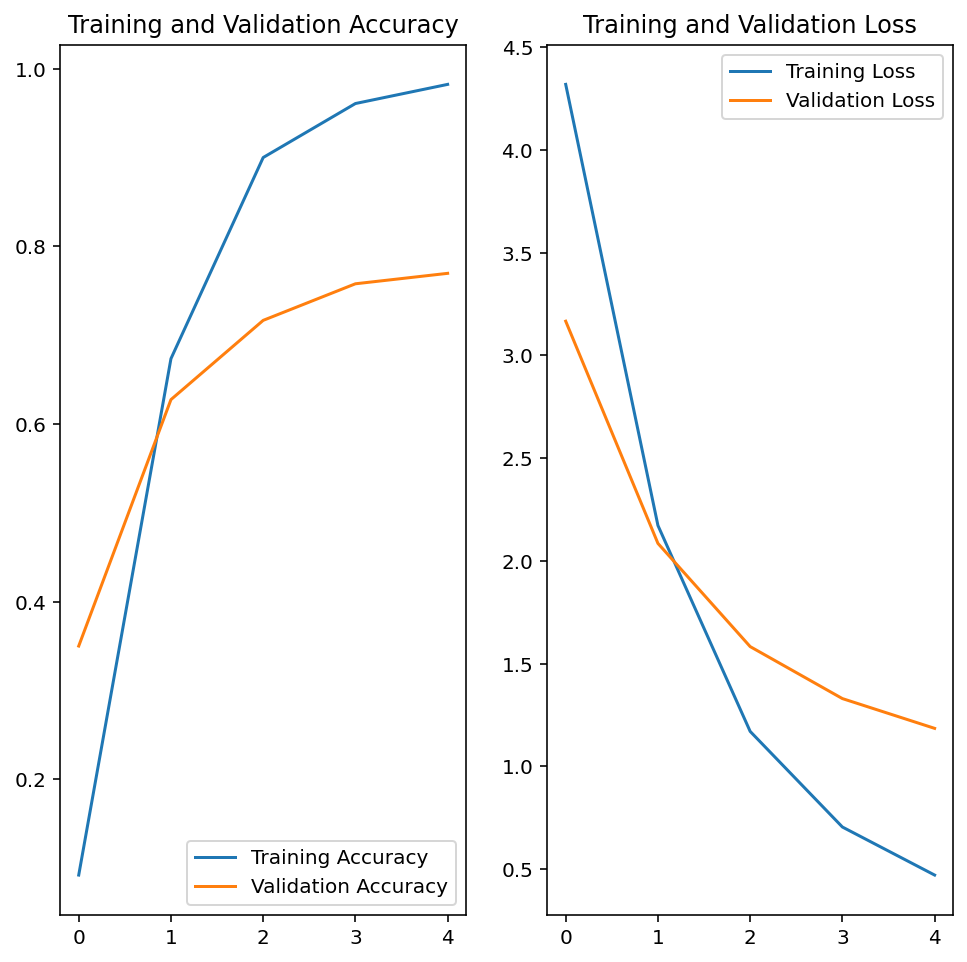

In [17]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = train_history.history['accuracy']
validation_accuracy = train_history.history['val_accuracy']

training_loss = train_history.history['loss']
validation_loss = train_history.history['val_loss']

epochs_range=range(len(training_accuracy))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### We can see in th plot above that the increase in accuracy is starting to plateau at the 5th epoch, while the loss also plateaus. I tried training the model for 6 epochs but the increase in accuracy was negligible considering the extra training time. Therefore I consider 5 epochs the optimal for this model.

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [18]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = model.evaluate(test_batches)

print(f'The total loss for the entire test set is: {loss:.3f}')
print(f'The accuracy achieved with the entire test set is: {accuracy:.3f}')

181/181 [==============================] - 23s 130ms/step - loss: 1.2965 - accuracy: 0.7335
The total loss for the entire test set is: 1.296
The accuracy achieved with the entire test set is: 0.733


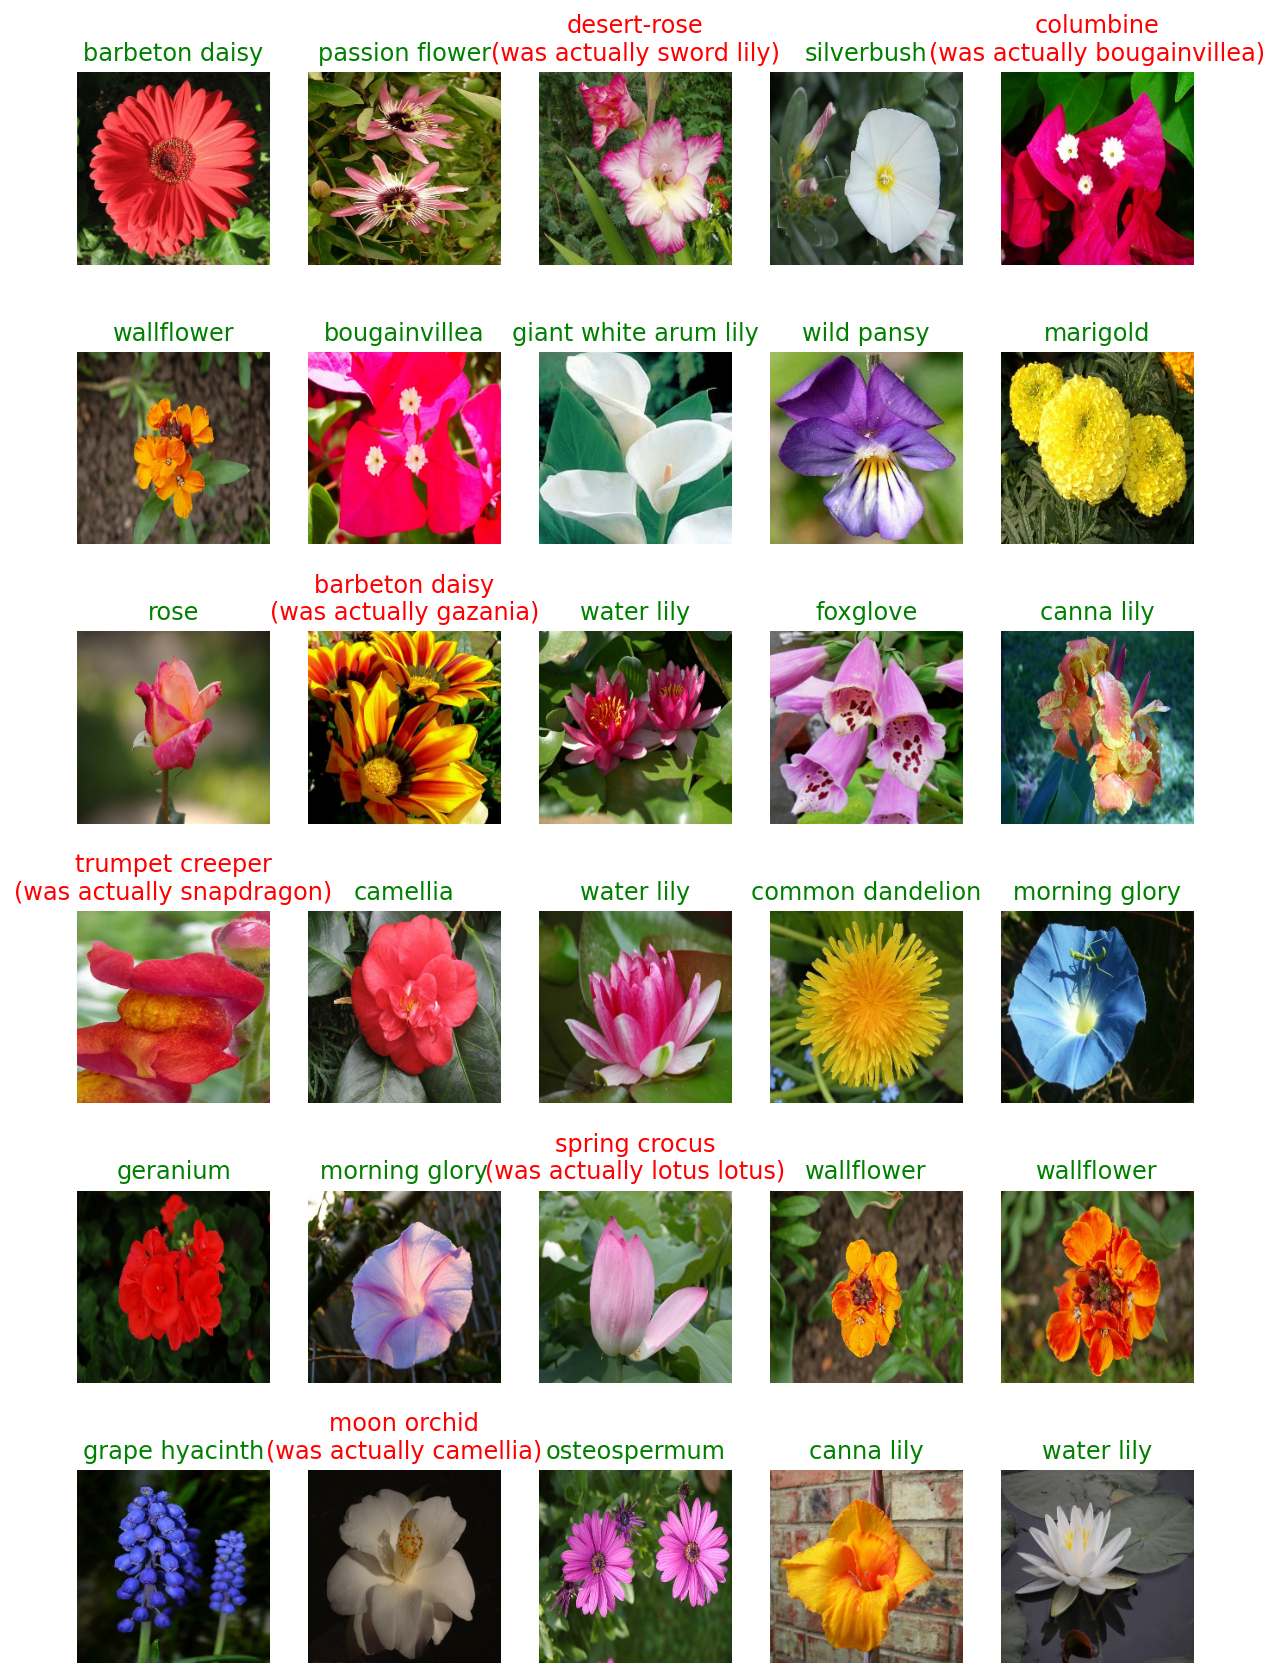

In [19]:
# Check some predictions to see visually how the model is performing
for image_batch, label_batch in test_batches.take(1):
    prediction_matrix = model.predict(image_batch)
    images = image_batch.numpy().squeeze()
    labels = label_batch.numpy()
   
plt.figure(figsize=(10,15))

for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(images[n], cmap = plt.cm.binary)
    color = 'green' if np.argmax(prediction_matrix[n]) == labels[n] else 'red'
    # If the prediction is good, use the prediction as title. If not, include the predicted label and the real one
    if color == 'green':
        plt.title(class_names[str(np.argmax(prediction_matrix[n])+1)], color=color)
    elif color == 'red':
        plt.title((class_names[str(np.argmax(prediction_matrix[n])+1)] + '\n(was actually ' + class_names[str(labels[n] +1 )] +')'), color=color)
    plt.axis('off')

#### Here the model guessed 24 out of 30 right --> Accuracy = 0.8

## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [0]:
# TODO: Save your trained model as a Keras model.
model.save('./flower_classifier_project.h5')

## Load the Keras Model

Load the Keras model you saved above.

In [21]:
# TODO: Load the Keras model
# Added argument custom_objects to avoid error "Unknown layer: KerasLayer"
# as found on github post (https://github.com/tensorflow/tensorflow/issues/26835)

reloaded_model = tf.keras.models.load_model('./flower_classifier_project.h5', custom_objects={'KerasLayer':hub.KerasLayer})

reloaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [22]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = reloaded_model.evaluate(test_batches)

print(f'The total loss for the entire test set is: {loss:.3f}')
print(f'The accuracy achieved with the entire test set is: {accuracy:.3f}')

181/181 [==============================] - 24s 130ms/step - loss: 1.2965 - accuracy: 0.7335
The total loss for the entire test set is: 1.296
The accuracy achieved with the entire test set is: 0.733


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [0]:
# TODO: Create the process_image function
def process_image(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224 , 224))
    image /= 255
    image = image.numpy()
    return image


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

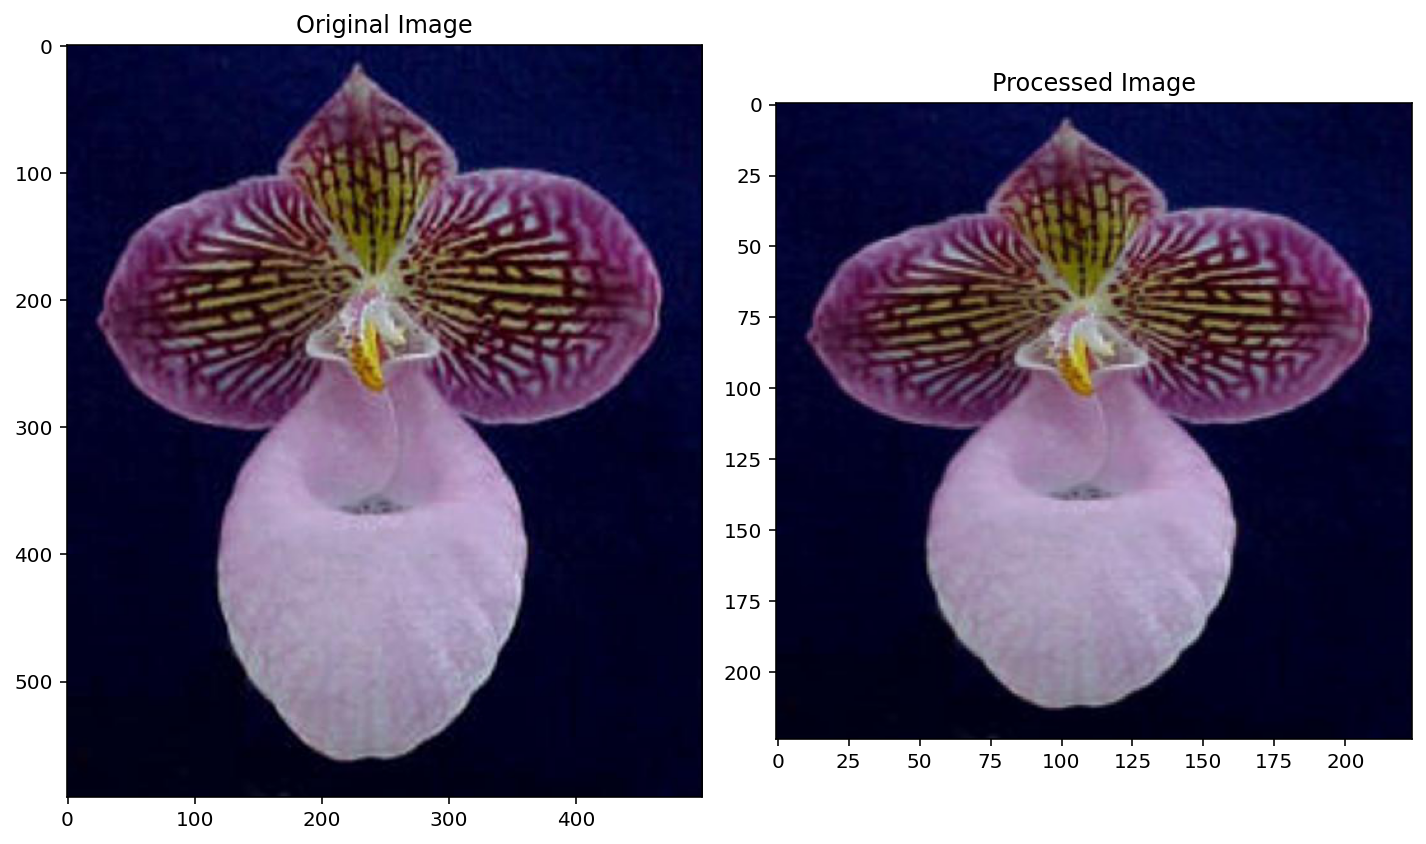

In [24]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [0]:
# TODO: Create the predict function
def predict(image_path, model, top_k):
    image = np.asarray(Image.open(image_path))
    processed_image = process_image(image)
    expanded_processed_image = np.expand_dims(processed_image, axis=0)
    prediction_vector = model.predict(expanded_processed_image)
    
    probs = np.sort(prediction_vector)[0][::-1][:top_k]
    class_probs = np.argsort(prediction_vector)[0][::-1][:top_k]
    
    return probs, class_probs

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

[ 1 79 76 67  5]
[0.9747976  0.00964825 0.00220418 0.00179769 0.00151022]


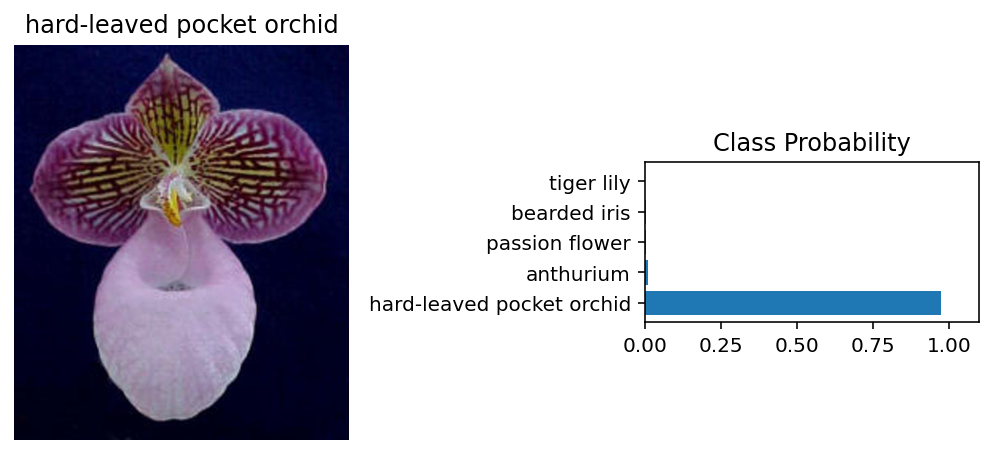

In [26]:
# TODO: Plot the input image along with the top 5 classes
image = './test_images/hard-leaved_pocket_orchid.jpg'
top_k = 5
probs, class_probs = predict(image , reloaded_model, top_k)

fig, (ax1, ax2) = plt.subplots(figsize=(7,7), ncols=2)
ax1.imshow(np.asarray(Image.open(image)), cmap = plt.cm.binary)
ax1.axis('off')
ax1.set_title(class_names[str(class_probs[0] + 1)])
ax2.barh(np.arange(top_k), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(top_k))
ax2.set_yticklabels([class_names[str(i + 1)] for i in class_probs], size='medium');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()

print(class_probs)
print(probs)